## Simulation system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Početni parametri

In [6]:
# Simulation parameters
num_points = 3 * 30 * 24 * 60  # 3 months of data, assuming 30 days per month
anomaly_chance = np.random.uniform(0.00005, 0.00012)  # [0.005-0.012]% chance of an anomaly
times = pd.date_range(start="2024-04-20", periods=num_points, freq='T')

# Anomaly counter
anomalies = 0

Days of anomaly:  37.041666666666664
Days of anomaly:  60.916666666666664
Days of anomaly:  50.208333333333336
Days of anomaly:  79.91666666666667
Days of anomaly:  14.916666666666666
Days of anomaly:  13.583333333333334
Days of anomaly:  83.625
Days of anomaly:  86.29166666666667
Days of anomaly:  59.0
Number of anomalies: 9


### Generiranje podataka

In [ ]:
# Generating simulated data
accelerometer = np.random.uniform(-16, 16, size=(num_points, 3))
gyroscope = np.random.uniform(-2000, 2000, size=(num_points, 3))
magnetometer = np.random.uniform(-1300, 1300, size=(num_points, 3))
temperature = np.random.uniform(5, 40, num_points)
pressure = np.random.uniform(30, 110, num_points)
light = np.random.uniform(0.01, 64000, num_points)

### Anomalije

In [ ]:
# Introducing anomalies with variable lengths
for _ in range(int(num_points * anomaly_chance)):
    start = np.random.randint(0, num_points)
    duration = np.random.randint(30, int(1.5 * 24 * 60))  # From 30 minutes to 1.5 days (in minutes)
    end = min(start + duration, num_points)

    # Randomly choose which sensors will have anomalies
    sensors = ['accelerometer', 'gyroscope', 'magnetometer', 'temperature', 'pressure', 'light']
    num_sensors_affected = np.random.choice([1, 2], p=[0.8, 0.2])  # 80% chance for 1 sensor, 20% for 2 sensors
    affected_sensors = np.random.choice(sensors, size=num_sensors_affected, replace=False)

    if 'accelerometer' in affected_sensors:
        accelerometer[start:end] += np.random.normal(2, 1, (end - start, 3))
    if 'gyroscope' in affected_sensors:
        gyroscope[start:end] += np.random.normal(300, 50, (end - start, 3))
    if 'magnetometer' in affected_sensors:
        magnetometer[start:end] += np.random.normal(100, 20, (end - start, 3))
    if 'temperature' in affected_sensors:
        temperature[start:end] += np.random.normal(10, 2, end - start)
    if 'pressure' in affected_sensors:
        pressure[start:end] += np.random.normal(15, 5, end - start)
    if 'light' in affected_sensors:
        light[start:end] = 0

    print("Hours of anomaly: ", (duration)/24)
    anomalies += 1

### Izrada DataFrame-a

In [ ]:
# Print the number of anomalies
print(f"Number of anomalies: {anomalies}")

# Creating DataFrame
df = pd.DataFrame({
    'Accelerometer_X': accelerometer[:, 0],
    'Accelerometer_Y': accelerometer[:, 1],
    'Accelerometer_Z': accelerometer[:, 2],
    'Gyroscope_X': gyroscope[:, 0],
    'Gyroscope_Y': gyroscope[:, 1],
    'Gyroscope_Z': gyroscope[:, 2],
    'Magnetometer_X': magnetometer[:, 0],
    'Magnetometer_Y': magnetometer[:, 1],
    'Magnetometer_Z': magnetometer[:, 2],
    'Temperature': temperature,
    'Pressure': pressure,
    'Light': light
}, index=times)

### Prikazivanje podataka

       Accelerometer_X  Accelerometer_Y  Accelerometer_Z    Gyroscope_X  \
count    129600.000000    129600.000000    129600.000000  129600.000000   
mean          1.777182         1.824787         1.807058       4.725324   
std          13.191466        13.206364        13.229056    1156.433737   
min         -15.999920       -15.999291       -15.999736   -1999.948176   
25%          -7.749281        -7.621168        -7.664099    -998.691641   
50%           0.598885         0.650666         0.587745       5.180043   
75%           8.923651         8.929780         8.931826    1009.688603   
max          98.485618        97.871179        93.767658    2369.299474   

         Gyroscope_Y    Gyroscope_Z  Magnetometer_X  Magnetometer_Y  \
count  129600.000000  129600.000000   129600.000000   129600.000000   
mean        4.713886       6.137520        5.511765        1.619390   
std      1155.591839    1154.992205      751.268054      751.001791   
min     -1999.898104   -1999.991676    -

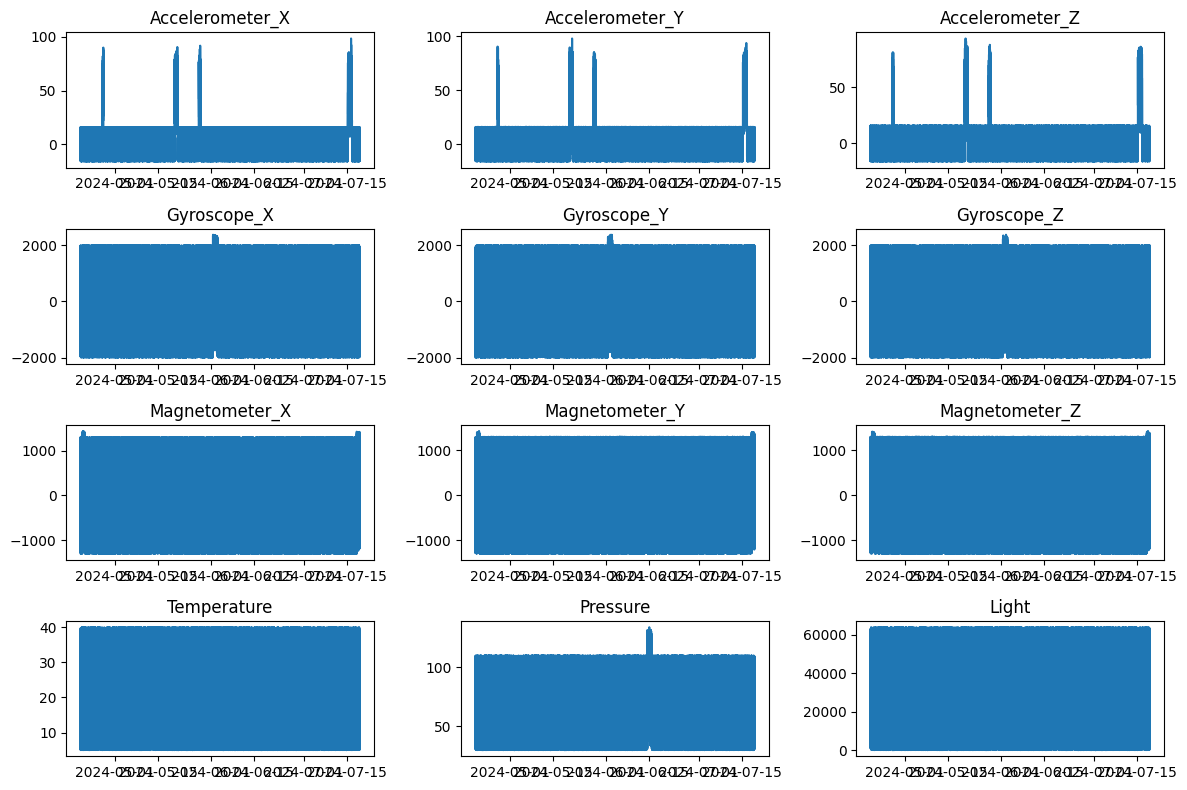

In [7]:
# Displaying statistical summary of the data
print(df.describe())

# Displaying the data
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.plot(df.index, df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### Spremanje podataka u CSV datoteku

In [8]:
# Sava data to CSV file
df.to_csv('sensor_data.csv')